# 사업(projects) 3개년  raw 데이터셋 EDA 분석
### '사업기간종료일' - '사업기간시작일' = '일수 차이' 계산

> 2023,2020,2018년 3개년 raw 데이터셋(csv) EDA 분석 


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
# CSV 파일 읽어오기
csv_file_23 = 'E:/project/devcourse_DW_BI_project/data/한국노인인력개발원_노인일자리사업 통합정보_20230417 최종.csv'


df_23 = pd.read_csv(csv_file_23, encoding='cp949')
header_23 = df_23.columns.tolist()

In [53]:
# CSV 파일 읽어오기
csv_file_20 = 'E:/project/devcourse_DW_BI_project/data/raw/2020_사업통합정보_2020.csv'

df_20 = pd.read_csv(csv_file_20, encoding='cp949')
header_20 = df_20.columns.tolist()

In [54]:
# CSV 파일 읽어오기
csv_file_18 = 'E:/project/devcourse_DW_BI_project/data/raw/2018_사업통합정보_2018.csv'

df_18 = pd.read_csv(csv_file_18, encoding='cp949')
header_18 = df_18.columns.tolist()

In [55]:
# 모든 헤더 확인 

print(header_23, len(header_23))
print(header_20, len(header_20))
print(header_18, len(header_18))


['사업유형', '사업번호', '사업계획변경순번', '사업년도', '계속사업여부', '계속사업시작연도', '사업유형코드', '비예산여부', '특수사업명코드', '사업명', '관활시도명', '시군구코드', '관할시군구', '기관ID', '수행기관시도명', '수행기관시군구', '사업기간시작일', '사업기간종료일', '사업계획서상태코드', '목표일자리수', '최초등록첨부파일', '최근승인첨부파일', '삭제여부'] 23
['사업유형', '사업번호', '사업계획변경순번', '사업년도', '계속사업여부', '계속사업시작년도', '사업유형코드', '예산구분', '특수사업코드', '사업명', '사업내용', '위탁여부', '관할시군구', '기관아이디', '사업기간시작일', '사업기간종료일', '사업계획서상태코드', '추경여부', '목표일자리수', '추경목표사업량', '최초등록첨부파일', '최근승인첨부파일', '삭제여부'] 23
['사업유형', '사업번호', '사업계획변경순번', '사업년도', '계속사업여부', '계속사업시작년도', '사업유형코드', '예산구분', '특수사업코드', '사업명', '사업내용', '위탁여부', '관할시군구', '기관아이디', '사업기간시작일', '사업기간종료일', '사업계획서상태코드', '추경여부', '목표일자리수', '추경목표사업량', '최초등록첨부파일', '최근승인첨부파일', '삭제여부'] 23


# 사업시간시작일 > 사업기간종료일인 케이스

# 형변환 후 날짜 계산 

### 2023

In [56]:
# '사업기간시작일'과 '사업기간종료일' 열을 Datetime으로 변환
df_23['사업기간시작일'] = pd.to_datetime(df_23['사업기간시작일'])
df_23['사업기간종료일'] = pd.to_datetime(df_23['사업기간종료일'])

# 일수 차이 계산
df_23['일수차이'] = (df_23['사업기간종료일'] - df_23['사업기간시작일']).dt.days

In [57]:
df_23.sort_values(by='일수차이')

,사업유형,사업번호,사업계획변경순번,사업년도,계속사업여부,계속사업시작연도,사업유형코드,비예산여부,특수사업명코드,사업명,...,수행기관시도명,수행기관시군구,사업기간시작일,사업기간종료일,사업계획서상태코드,목표일자리수,최초등록첨부파일,최근승인첨부파일,삭제여부,일수차이
2349,사회서비스형,2022-42489,2,2022,N,2022,시니어 컨설턴트(B-11),N,105001,시니어컨설턴트,...,경기도,구리시,2022-04-01,2022-04-30,승인완료,10,[붙임] 2022년 시니어컨설턴트 사업계획서.hwp,[붙임2] 2022년 시니어컨설턴트 사업계획서(수정).hwp,N,29
1673,사회서비스형,2022-72920,1,2022,N,2022,기타(B-15),N,105001,복지도우미,...,전라북도,익산시,2022-11-01,2022-11-30,임시,8,2022년 사회형 사업계획서 변경요청 - 복지도우미.hwp,NaN,Y,29
1537,공익활동형,2022-09935,2,2022,Y,2020,지역사회 환경개선 봉사(A-16),N,105001,쾌적한 환경 밝은동네,...,광주광역시,남구,2022-01-01,2022-01-31,승인완료,21,2022년 노인일자리 및 사회활동지원사업 참여신청서 12.3.hwp,밝은동네2022년+노인일자리+및+사회활동지원사업+참여신청서2022.02.03.hwp,N,30
1758,공익활동형,2022-73875,1,2022,N,2022,지역사회 환경개선 봉사(A-16),N,105001,초록마을,...,전라북도,남원시,2022-12-01,2022-12-31,승인완료,72,[남원시니어클럽]12월 추경+사업계획서+(718명).hwp,NaN,N,30
2693,공익활동형,2022-08479,5,2022,Y,2019,지역사회 환경개선 봉사(A-16),N,105001,동네방네푸른세상,...,광주광역시,남구,2022-01-01,2022-01-31,승인완료,21,2022년+노인일자리+및+사회활동지원사업(최종).hwp,2022년+노인일자리+및+사회활동지원사업(최종).hwp,N,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6500,시장형,2022-05588,6,2022,Y,2008,참기름 및 장류(E-02),N,105001,친환경웰빙장아찌사업단,...,전라남도,목포시,2022-01-01,2022-12-31,승인완료,10,7. 시장형 친환경웰빙장아찌사업단 계획서(2021년11월16일).hwp,NaN,N,364
6499,사회서비스형,2022-05500,6,2022,Y,2019,보육시설(어린이집 등) 지원(B-01),N,105001,보육시설도우미사업,...,경상남도,창원시,2022-01-01,2022-12-31,승인완료,30,2022년보육시설도우미사업계획서.hwp,2022년보육시설도우미사업계획서-최종.hwp,N,364
6498,공익활동형,2022-05845,2,2022,Y,2021,기타(A-19),N,105001,사랑의 콜센터-따르릉,...,경기도,구리시,2022-01-01,2022-12-31,승인완료,20,2022년 사랑의 콜센터 따르릉(완료).hwp,2022년 사랑의 콜센터 따르릉(수정완료).hwp,N,364
6492,공익활동형,2022-05880,6,2022,Y,2019,공원 놀이터 등 공공시설 봉사(A-13),N,105001,공원관리봉사,...,충청북도,청주시,2022-01-01,2022-12-31,승인완료,173,2022년 공원관리봉사 사업계획서.hwp,2022년 공원관리봉사 사업계획서(12.23).hwp,N,364


### 2020

In [58]:
# '사업기간시작일'과 '사업기간종료일' 열을 Datetime으로 변환
df_20['사업기간시작일'] = pd.to_datetime(df_20['사업기간시작일'])
df_20['사업기간종료일'] = pd.to_datetime(df_20['사업기간종료일'])

# 일수 차이 계산
df_20['일수차이'] = (df_20['사업기간종료일'] - df_20['사업기간시작일']).dt.days

In [59]:
df_20.sort_values(by='일수차이')

,사업유형,사업번호,사업계획변경순번,사업년도,계속사업여부,계속사업시작년도,사업유형코드,예산구분,특수사업코드,사업명,...,사업기간시작일,사업기간종료일,사업계획서상태코드,추경여부,목표일자리수,추경목표사업량,최초등록첨부파일,최근승인첨부파일,삭제여부,일수차이
1535,공익활동형,2020-42112,1,2020,Y,2020.0,공공의료 및 복지시설 봉사(A-15),101001,105001,마을지킴이,...,2021-01-04,2011-11-30,102AA,N,597,NaN,21년+사업계획서(마을지킴이)-안미정.hwp,NaN,Y,-3323
5003,시장형,2020-07882,1,2020,N,2020.0,매장운영(E-04),101001,105001,111,...,2019-11-29,2019-11-29,102AA,N,1,NaN,2020년실버카페사업단 사업계획서.hwp,NaN,Y,0
7779,시장형,2020-05630,1,2020,N,2020.0,반제품 제조 및 납품(E-01),101001,105001,하우스클립 조립 사업단,...,2019-11-22,2019-11-22,102AA,N,11,NaN,2020년 시장형사업단 하우스클립 조립 사업단.hwp,NaN,Y,0
7791,시장형,2020-05636,1,2020,N,2020.0,반제품 제조 및 납품(E-01),101001,105001,오이망코그물 사업단,...,2019-11-22,2019-11-22,102AA,N,1,NaN,2020년 시장형사업단 오이망코그물 사업단.hwp,NaN,Y,0
7777,시장형,2020-05627,1,2020,N,2020.0,반제품 제조 및 납품(E-01),101001,105001,전선결속 조립 사업단,...,2019-11-29,2019-11-30,102AA,N,1,NaN,2020년 시장형사업단 전선결속 조립 사업단.hwp,NaN,Y,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1462,공익활동형,2020-42174,1,2020,N,2020.0,공원 놀이터 등 공공시설 봉사(A-13),101001,105001,해양환경지원단,...,2021-02-01,2022-12-31,102AA,N,60,NaN,남목노인복지관 노인일자리 사업계획서.hwp,NaN,Y,698
1319,공익활동형,2020-42173,1,2020,N,2020.0,지역사회 환경개선 봉사(A-16),101001,105001,전통시장도우미단,...,2021-02-01,2022-12-31,102AA,N,20,NaN,남목노인복지관 노인일자리 사업계획서.hwp,NaN,Y,698
1321,공익활동형,2020-41981,1,2020,N,2020.0,공공의료 및 복지시설 봉사(A-15),101001,105001,경로당 관리 지원 활동,...,2021-01-01,2022-11-30,102AA,N,230,NaN,2021년 복지시설봉사(중구)사업계획서(등록).hwp,NaN,Y,698
8047,공익활동형,2020-03407,1,2020,Y,2016.0,공원 놀이터 등 공공시설 봉사(A-13),101001,105001,환경관리봉사단,...,2019-01-01,2020-11-30,102AA,N,92,NaN,환경관리봉사 2020사업 계획서.hwp,NaN,Y,699


### 2018

In [60]:
# '사업기간시작일'과 '사업기간종료일' 열을 Datetime으로 변환
df_18['사업기간시작일'] = pd.to_datetime(df_18['사업기간시작일'])
df_18['사업기간종료일'] = pd.to_datetime(df_18['사업기간종료일'])

# 일수 차이 계산
df_18['일수차이'] = (df_18['사업기간종료일'] - df_18['사업기간시작일']).dt.days

In [61]:
df_18.sort_values(by='일수차이')

,사업유형,사업번호,사업계획변경순번,사업년도,계속사업여부,계속사업시작년도,사업유형코드,예산구분,특수사업코드,사업명,...,사업기간시작일,사업기간종료일,사업계획서상태코드,추경여부,목표일자리수,추경목표사업량,최초등록첨부파일,최근승인첨부파일,삭제여부,일수차이
7922,공익활동형,2018-08513,1,2018,N,2018.0,노노케어(A-01),101001,105001,test,...,2018-11-28,2018-11-28,102AA,N,1,NaN,전화번호이메일2.docx,NaN,Y,0
8096,공익활동형,2018-08505,1,2018,N,2018.0,노노케어(A-01),101001,105001,rest,...,2018-11-28,2018-11-28,102AA,N,1,NaN,전화번호이메일2.docx,NaN,Y,0
8095,공익활동형,2018-08504,1,2018,N,2018.0,노노케어(A-01),101001,105001,te,...,2018-11-28,2018-11-28,102AA,N,1,NaN,전화번호이메일2.docx,NaN,Y,0
7344,공익활동형,2018-08525,1,2018,N,2018.0,노노케어(A-01),101001,105001,1,...,2018-12-03,2018-12-03,102AA,N,1,NaN,2018년 11월 월간업무 보고서_박한승.hwp,NaN,Y,0
7350,공익활동형,2018-08510,1,2018,N,2018.0,노노케어(A-01),101001,105001,test,...,2018-11-28,2018-11-28,102AA,N,1,NaN,NaN,NaN,Y,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6938,시장형,2018-02253,1,2018,Y,2009.0,공동작업장 운영사업(E-01),101001,105001,은빛나눔일터(공동작업장),...,2018-01-01,2018-12-31,102PC,N,58,NaN,2018년 은빛나눔일터사업단 사업계획서.hwp,NaN,N,364
6937,시장형,2018-02244,2,2018,Y,2017.0,공산품제작 및 판매사업(E-05),101001,105001,시니어플라워,...,2018-01-01,2018-12-31,102PC,N,10,NaN,사업계획서(시니어플라워).hwp,NaN,N,364
4762,공익활동형,2018-00331,1,2018,Y,2014.0,노노케어(A-01),101001,105001,효림햇빛도우미 파견사업,...,2018-01-01,2018-12-31,102PC,N,90,NaN,2018년 노인일자리 및 사회활동지원사업 사업계획서-효림원.hwp,NaN,N,364
6955,시장형,2018-02252,4,2018,Y,2006.0,공동작업장 운영사업(E-01),101001,105001,어르신나눔터,...,2018-01-01,2018-12-31,102PC,N,31,NaN,2018년 시장형사업단 사업계획서.hwp,NaN,N,364


## '일수차이' 히스토그램화

### 2023

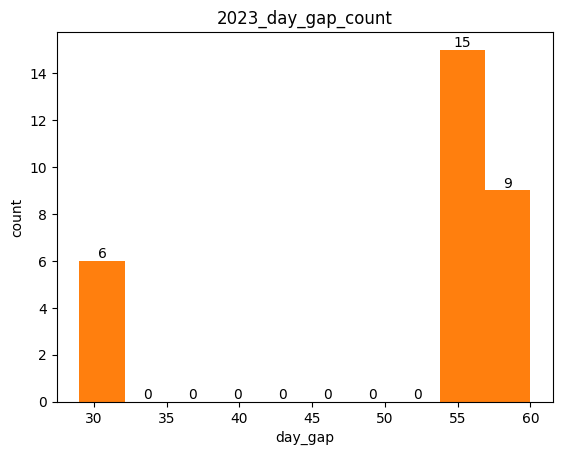

In [62]:
import matplotlib.pyplot as plt

# 히스토그램 그리기
sorted_series = df_23['일수차이'].sort_values()
plt.hist(sorted_series[:30], bins=50)
plt.xlabel('일수차이')
plt.xlabel('day_gap')
plt.ylabel('count')
plt.title('2023_day_gap_count')


# 각 막대의 범위와 빈도수 계산
bin_counts, bin_edges, _ = plt.hist(sorted_series[:30], bins=10)

# 각 막대에 정확한 값을 x축에 표시
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
for count, x in zip(bin_counts, bin_centers):
    plt.text(x, count, str(int(count)), ha='center', va='bottom')

plt.show()

plt.show()

In [70]:
day_gap_values_23 = df_23['일수차이'].value_counts().sort_index()
print(day_gap_values_23)

일수차이
29        2
30        3
32        1
56       15
58        1
       ... 
360      49
361    1311
362    1892
363     289
364    3053
Name: count, Length: 146, dtype: int64


### 2020

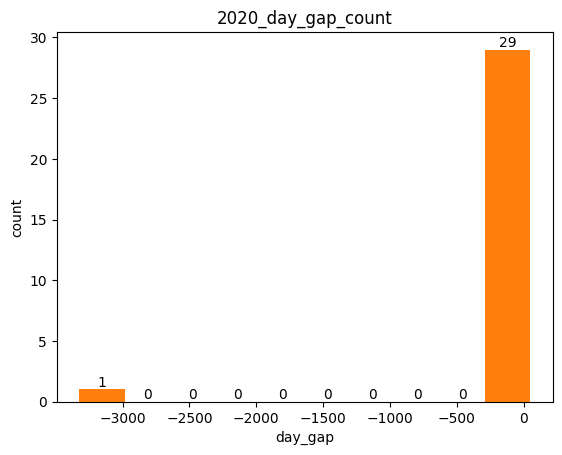

In [64]:
import matplotlib.pyplot as plt

# 히스토그램 그리기
sorted_series = df_20['일수차이'].sort_values()
plt.hist(sorted_series[:30], bins=10)
plt.xlabel('일수차이')
plt.xlabel('day_gap')
plt.ylabel('count')
plt.title('2020_day_gap_count')


# 각 막대의 범위와 빈도수 계산
bin_counts, bin_edges, _ = plt.hist(sorted_series[:30], bins=10)

# 각 막대에 정확한 값을 x축에 표시
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
for count, x in zip(bin_counts, bin_centers):
    plt.text(x, count, str(int(count)), ha='center', va='bottom')

plt.show()

plt.show()

In [71]:
day_gap_values_20 = df_20['일수차이'].value_counts().sort_index()
print(day_gap_values_20)

일수차이
-3323    1
 0       3
 1       1
 4       1
 8       1
        ..
 670     1
 695     1
 698     5
 699     1
 1094    1
Name: count, Length: 156, dtype: int64


### 2018

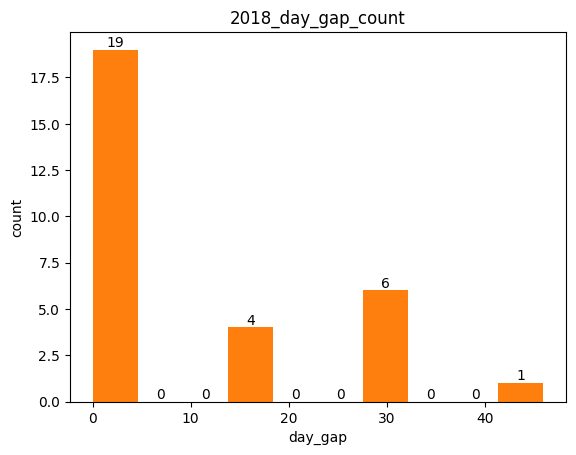

In [42]:
import matplotlib.pyplot as plt

# 히스토그램 그리기
sorted_series = df_18['일수차이'].sort_values()
plt.hist(sorted_series[:30], bins=10)
plt.xlabel('일수차이')
plt.xlabel('day_gap')
plt.ylabel('count')
plt.title('2018_day_gap_count')


# 각 막대의 범위와 빈도수 계산
bin_counts, bin_edges, _ = plt.hist(sorted_series[:30], bins=10)

# 각 막대에 정확한 값을 x축에 표시
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
for count, x in zip(bin_counts, bin_centers):
    plt.text(x, count, str(int(count)), ha='center', va='bottom')

plt.show()

plt.show()

In [72]:
day_gap_values_18 = df_18['일수차이'].value_counts().sort_index()
print(day_gap_values_18)

일수차이
0        15
1         4
14        3
15        1
30        6
       ... 
360      10
361      16
362       1
363     476
364    1572
Name: count, Length: 169, dtype: int64


# 삭제 여부 N인 것들만 일수차이 확인

In [73]:
filtered_df_23 = df_23[df_23['삭제여부'] == 'N']
일수차이_values_23 = filtered_df_23['일수차이'].value_counts().sort_index()
print(일수차이_values_23)

일수차이
29        1
30        3
32        1
56       15
58        1
       ... 
360      47
361    1242
362    1770
363     280
364    2783
Name: count, Length: 136, dtype: int64


In [74]:
filtered_df_20 = df_20[df_20['삭제여부'] == 'N']
일수차이_values_20 = filtered_df_20['일수차이'].value_counts().sort_index()
print(일수차이_values_20)

일수차이
28         1
30         6
38         2
39         1
42         1
        ... 
363       60
364     1248
365     3839
670        1
1094       1
Name: count, Length: 131, dtype: int64


In [75]:
filtered_df_18 = df_18[df_18['삭제여부'] == 'N']
일수차이_values_18 = filtered_df_18['일수차이'].value_counts().sort_index()
print(일수차이_values_18)

일수차이
30        1
47        1
58        4
59        1
60        4
       ... 
360       9
361      13
362       1
363     415
364    1347
Name: count, Length: 151, dtype: int64
